In [1737]:
import pandas as pd
import numpy as np

In [1738]:
df=pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [1739]:
Mydata=df[['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']]
Mydata

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


# Q1. There's one column with missing values. What is it?

In [1740]:
Mydata.isnull().sum()


engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

# Q2. What's the median (50% percentile) for variable 'horsepower'?

```````````````````

49
99
149
199
Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures

```````````````````````

In [1741]:
Mydata['horsepower'].median()

np.float64(149.0)

In [1742]:
n=len(Mydata)

n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-(n_val+n_test)

n_val,n_test,n_train,n_val+n_test+n_train

(1940, 1940, 5824, 9704)

In [1743]:
df_val=Mydata.iloc[:n_val]
df_test=Mydata.iloc[n_val:n_val+n_test]
df_train=Mydata.iloc[n_val+n_test:]
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
3880,180,119.0,3582.745396,2012,11.345737
3881,240,152.0,2892.395450,2019,15.994232
3882,290,152.0,3515.849661,2003,12.600823
3883,170,121.0,2931.819348,2012,14.816853
3884,210,147.0,2614.520645,2008,16.126712
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [1744]:
idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [1745]:
df_train=Mydata.iloc[idx[:n_train]]
df_val=Mydata.iloc[idx[n_train:n_train+n_val]]
df_test=Mydata.iloc[idx[n_train+n_val:]]
len(df_train)

5824

In [1746]:
y_train=np.log1p(df_train.fuel_efficiency_mpg.values)
y_val=np.log1p(df_val.fuel_efficiency_mpg.values)
y_test=np.log1p(df_test.fuel_efficiency_mpg.values)
#len(df_train)

In [1747]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

# Q3. 
````````````````
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?
Options:

With 0
With mean
Both are equally good

````````````````````````


In [1748]:
base=['engine_displacement','horsepower','vehicle_weight','model_year']
df_train_median=df_train['horsepower'].median()
X_val=df_val[base].fillna(0).values
X_val_mean=df_val[base].fillna(df_train_median).values
X_val,df_train_median

(array([[ 180.        ,  112.        , 2772.13441008, 2020.        ],
        [ 260.        ,  138.        , 3014.06152983, 2022.        ],
        [ 140.        ,  181.        , 3652.18615117, 2016.        ],
        ...,
        [ 230.        ,  202.        , 3303.00068812, 2008.        ],
        [ 220.        ,  169.        , 3293.42025107, 2008.        ],
        [ 200.        ,  117.        , 2692.7812918 , 2004.        ]],
       shape=(1940, 4)),
 np.float64(149.0))

In [1749]:
def train_linear_regression(X,y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)

    return w_full[0],w_full[1:]

In [1750]:
w0,w=train_linear_regression(X_val,y_val)
w0_mean,w_mean=train_linear_regression(X_val_mean,y_val)
y_pred=w0 + X_val.dot(w)
y_pred_mean=w0_mean + X_val.dot(w_mean)
w0,w


(np.float64(3.4087896780530684),
 array([-2.06069513e-07,  2.57726464e-04, -3.22445032e-04,  1.39318931e-04]))

In [1751]:
def rmse(y,y_pred):
    se=(y-y_pred)**2
    mse=se.mean()
    return np.sqrt(mse)

In [1752]:
rmse(y_val,y_pred),rmse(y_val,y_pred_mean)

(np.float64(0.03991206781465131), np.float64(0.04437729504429755))

In [1753]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X=df_num.values
    return X

In [1754]:
X_val=prepare_X(df_val)
w0,w=train_linear_regression(X_val,y_val)

X_val=prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

round(rmse(y_val,y_pred),2),round(rmse(y_val,y_pred_mean),2)

(np.float64(0.04), np.float64(0.04))

<Axes: ylabel='Count'>

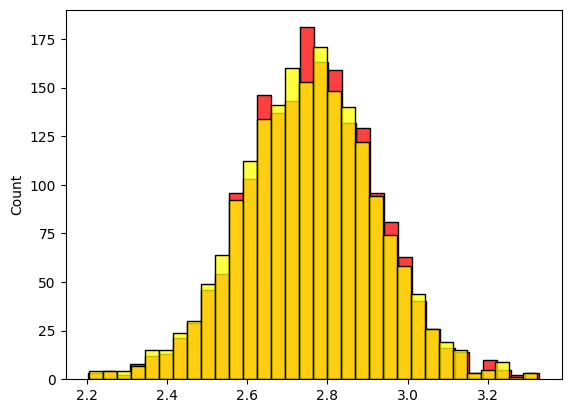

In [1755]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(y_pred,color='red')
sns.histplot(y_pred_mean,color='yellow')

# Question 4

`````````````````
Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If multiple options give the same best RMSE, select the smallest r.

Options:

0
0.01
1
10
100
```````````````````````

In [1756]:
def train_linear_regression_reg(X,y,r):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    
    XTX=X.T.dot(X)
    XTX= XTX+r * np.eye(XTX.shape[0])
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)

    return w_full[0],w_full[1:]

In [1774]:
for r in  [0, 0.01, 0.1, 1, 5, 10, 100]:
 X_val= prepare_X(df_val)
 w0,w=train_linear_regression_reg(X_val,y_val,r=r)

 X_val=prepare_X(df_val)
 y_pred = w0 + X_val.dot(w)

 score= rmse(y_val,y_pred) 
 print(r , w0 , round(score))



0 3.4087896780530684 0
0.01 2.3238344772513333 0
0.1 0.601323761546675 0
1 0.07148172733664448 0
5 0.014540994445934721 0
10 0.007286491443716608 0
100 0.0007308740986906705 0


# Question 5
```````````````````````````
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))
What's the value of std?

0.001
0.006
0.060
0.600
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

````````````````````````````````````

In [1758]:
idx=np.arange(n)
df_train = {}
df_val = {}
df_test = {}
for s in  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
 np.random.seed(s)
 np.random.shuffle(idx)
 df_train[s]=Mydata.iloc[idx[:n_train]]
 df_val[s]=Mydata.iloc[idx[n_train:n_train+n_val]]
 df_test[s]=Mydata.iloc[idx[n_train+n_val:]]

print(df_train[3].isnull().sum()) 

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64


In [1759]:
base=['engine_displacement','horsepower','vehicle_weight','model_year']
X_val={}
for s in  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  X_val[s]=df_val[s][base].fillna(0).values


In [1760]:
def train_linear_regression(X,y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)

    return w_full[0],w_full[1:]

In [1761]:
w0={}
w={}
y_pred={}
scores={}
def rmse(y,y_pred):
    se=(y-y_pred)**2
    mse=se.mean()
    return np.sqrt(mse)
for s in  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
 w0[s],w[s]=train_linear_regression(X_val[s],y_val)
 y_pred[s]=w0[s] + X_val[s].dot(w[s])
 scores[s]=rmse(y_val,y_pred[s])
#  print(w0[s],w[s]
print(scores)
score_values = np.array(list(scores.values()))
score_values

{0: np.float64(0.17167002860985825), 1: np.float64(0.17169413429906552), 2: np.float64(0.171710789936451), 3: np.float64(0.17177814527048346), 4: np.float64(0.17175751326167113), 5: np.float64(0.1717463463068836), 6: np.float64(0.1715271977647743), 7: np.float64(0.17150080716195343), 8: np.float64(0.17152781154752328), 9: np.float64(0.17172327834406723)}


array([0.17167003, 0.17169413, 0.17171079, 0.17177815, 0.17175751,
       0.17174635, 0.1715272 , 0.17150081, 0.17152781, 0.17172328])

In [1762]:
std = np.std(score_values)
std = round(std,4)
std

np.float64(0.0001)

# Question 6

```
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?
Options:

0.15
0.515
5.15
51.5

`````````````````````

In [1763]:
Mydata=df[['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']]
Mydata

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [1764]:
n=len(Mydata)

n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-(n_val+n_test)
print(n_val+n_train)

7764


In [1765]:
idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)


df_train=Mydata.iloc[idx[:n_train]]
df_val=Mydata.iloc[idx[n_train:n_train+n_val]]
df_test=df.iloc[idx[n_train+n_val:]]
df_train_val=Mydata.iloc[idx[:n_train+n_val]]


y_train_val=np.log1p(df_train_val.fuel_efficiency_mpg.values)
y_test_val=np.log1p(df_test.fuel_efficiency_mpg.values)
#len(df_train)

del df_train_val['fuel_efficiency_mpg']


In [1766]:
base=['engine_displacement','horsepower','vehicle_weight','model_year']
# X_train_val=df_train_val[base].fillna(0).values
# X_train_val


In [1767]:
def rmse(y,y_pred):
    se=(y-y_pred)**2
    mse=se.mean()
    return np.sqrt(mse)

In [1768]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X=df_num.values
    return X

In [1769]:
def train_linear_regression_reg(X,y,r):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    
    XTX=X.T.dot(X)
    XTX= XTX+r * np.eye(XTX.shape[0])
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)

    return w_full[0],w_full[1:]


In [1770]:
X_train_val= prepare_X(df_train_val)
w0,w=train_linear_regression_reg(X_train_val,y_train_val,0.001)
y_train_val_pred = w0 + X_train_val.dot(w)
score= rmse(y_train_val,y_train_val_pred) 
score

np.float64(0.03930728937601359)

In [1771]:
base=['engine_displacement','horsepower','vehicle_weight','model_year']
X_test_val=df_test[base].fillna(0).values

In [1772]:
def train_linear_regression_reg(X,y,r):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    
    XTX=X.T.dot(X)
    XTX= XTX+r * np.eye(XTX.shape[0])
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)

    return w_full[0],w_full[1:]

In [1773]:
X_test_val= prepare_X(df_test)
w0,w=train_linear_regression_reg(X_test_val,y_val,0.001)
y_test_val_pred = w0 + X_test_val.dot(w)
score= rmse(y_test_val,y_test_val_pred) 
score

np.float64(0.156158844796256)